C:\Users\jiin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


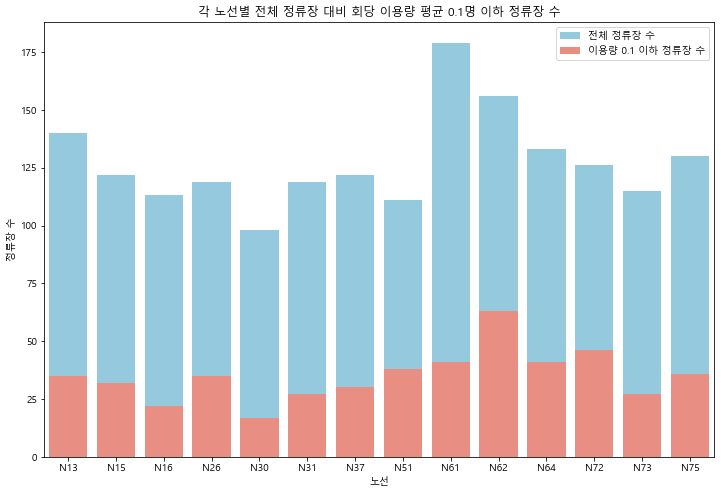

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\jiin\Desktop\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2015, 2024)]

df_list = []  # 각 CSV 파일의 데이터프레임을 저장할 리스트

for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# 정류장 이름에서 괄호와 숫자 제거
merged_df['역명'] = merged_df['역명'].str.replace(r'\(\d+\)', '', regex=True)

# '회당평균승차승객수' 열을 수치형으로 변환
merged_df['회당평균승차승객수'] = pd.to_numeric(merged_df['회당평균승차승객수'], errors='coerce')

# 노선별 이용량이 0.1 이하인 정류장 개수와 각 노선별 정류장 개수를 저장할 데이터프레임
station_counts_df = pd.DataFrame(columns=['Route', 'LowUsageStationCount', 'TotalStationCount'])

# 현재 운행하는 노선번호
target_routes = ['N13', 'N15', 'N16', 'N26', 'N30', 'N31', 'N37', 'N51', 'N61', 'N62', 'N64', 'N72', 'N73', 'N75']

# 현재 운행하는 노선만 선택
df_target_routes = merged_df[merged_df['노선번호'].isin(target_routes)]

# 각 노선별로 정류장 이용량 및 정류장 개수 계산
for route in target_routes:
    # 선택된 노선의 데이터 추출
    df_route = df_target_routes[df_target_routes['노선번호'] == route]
    
    # 정류장 개수 계산
    total_station_count = df_route['역명'].nunique()
    
    # 정류장별 승차 총 승객수 계산 (시간대별로 합산)
    station_sum = df_route.groupby('역명')['회당평균승차승객수'].mean()
    
    # 이용량이 0.1 이하인 정류장 개수 계산
    low_usage_stations = station_sum[station_sum <= 0.1]
    low_usage_station_count = len(low_usage_stations)
    
    # 결과를 데이터프레임에 추가
    station_counts_df = station_counts_df.append({
        'Route': route,
        'LowUsageStationCount': low_usage_station_count,
        'TotalStationCount': total_station_count
    }, ignore_index=True)

# 시각화
plt.figure(figsize=(12, 8))

# 그래프: 각 노선별 전체 정류장 수와 이용량 0.1 이하 정류장 수 겹쳐서 표시
sns.barplot(x='Route', y='TotalStationCount', data=station_counts_df, color='skyblue', label='전체 정류장 수')
sns.barplot(x='Route', y='LowUsageStationCount', data=station_counts_df, color='salmon', label='이용량 0.1 이하 정류장 수')

plt.title('각 노선별 전체 정류장 대비 회당 이용량 평균 0.1명 이하 정류장 수')
plt.xlabel('노선')
plt.ylabel('정류장 수')

plt.legend()
plt.show()

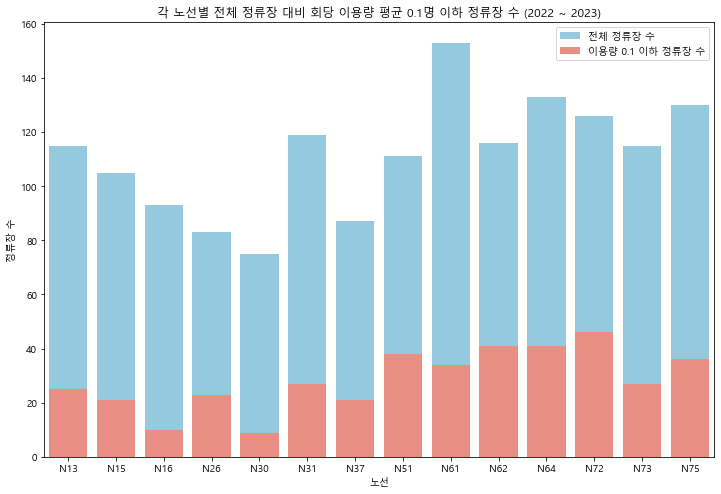

In [45]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\jiin\Desktop\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2022, 2024)]

df_list = []  # 각 CSV 파일의 데이터프레임을 저장할 리스트

for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# 정류장 이름에서 괄호와 숫자 제거
merged_df['역명'] = merged_df['역명'].str.replace(r'\(\d+\)', '', regex=True)

# '회당평균승차승객수' 열을 수치형으로 변환
merged_df['회당평균승차승객수'] = pd.to_numeric(merged_df['회당평균승차승객수'], errors='coerce')

# 노선별 이용량이 0.1 이하인 정류장 개수와 각 노선별 정류장 개수를 저장할 데이터프레임
station_counts_df = pd.DataFrame(columns=['Route', 'LowUsageStationCount', 'TotalStationCount'])

# 현재 운행하는 노선번호
target_routes = ['N13', 'N15', 'N16', 'N26', 'N30', 'N31', 'N37', 'N51', 'N61', 'N62', 'N64', 'N72', 'N73', 'N75']

# 현재 운행하는 노선만 선택
df_target_routes = merged_df[merged_df['노선번호'].isin(target_routes)]

# 각 노선별로 정류장 이용량 및 정류장 개수 계산
for route in target_routes:
    # 선택된 노선의 데이터 추출
    df_route = df_target_routes[df_target_routes['노선번호'] == route]
    
    # 정류장 개수 계산
    total_station_count = df_route['역명'].nunique()
    
    # 정류장별 승차 총 승객수 계산 (시간대별로 합산)
    station_sum = df_route.groupby('역명')['회당평균승차승객수'].mean()
    
    # 이용량이 0.1 이하인 정류장 개수 계산
    low_usage_stations = station_sum[station_sum <= 0.1]
    low_usage_station_count = len(low_usage_stations)
    
    # 결과를 데이터프레임에 추가
    station_counts_df = station_counts_df.append({
        'Route': route,
        'LowUsageStationCount': low_usage_station_count,
        'TotalStationCount': total_station_count
    }, ignore_index=True)

# 시각화
plt.figure(figsize=(12, 8))

# 그래프: 각 노선별 전체 정류장 수와 이용량 0.1 이하 정류장 수 겹쳐서 표시
sns.barplot(x='Route', y='TotalStationCount', data=station_counts_df, color='skyblue', label='전체 정류장 수')
sns.barplot(x='Route', y='LowUsageStationCount', data=station_counts_df, color='salmon', label='이용량 0.1 이하 정류장 수')

plt.title('각 노선별 전체 정류장 대비 회당 이용량 평균 0.1명 이하 정류장 수 (2022 ~ 2023)')
plt.xlabel('노선')
plt.ylabel('정류장 수')

plt.legend()
plt.show()

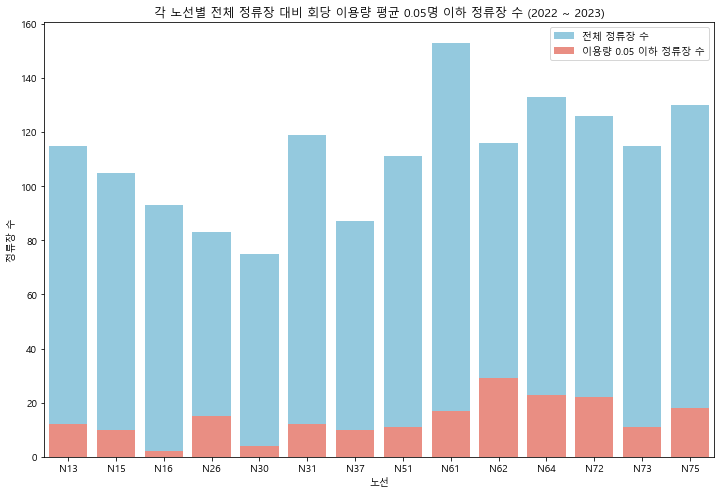

In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\jiin\Desktop\Dataset\NBusDataset'

# 2015년부터 2023년 파일들을 불러오기
files_to_read = [f'{year}_NBusData.csv' for year in range(2022, 2024)]

df_list = []  # 각 CSV 파일의 데이터프레임을 저장할 리스트

for file in files_to_read:
    file_path = os.path.join(folder_path, file)
    # 'cp949' 인코딩을 사용하여 파일 읽기
    df = pd.read_csv(file_path, encoding='cp949')
    df_list.append(df)

# 모든 데이터프레임을 합치기
merged_df = pd.concat(df_list, ignore_index=True)

# 정류장 이름에서 괄호와 숫자 제거
merged_df['역명'] = merged_df['역명'].str.replace(r'\(\d+\)', '', regex=True)

# '회당평균승차승객수' 열을 수치형으로 변환
merged_df['회당평균승차승객수'] = pd.to_numeric(merged_df['회당평균승차승객수'], errors='coerce')

# 노선별 이용량이 0.1 이하인 정류장 개수와 각 노선별 정류장 개수를 저장할 데이터프레임
station_counts_df = pd.DataFrame(columns=['Route', 'LowUsageStationCount', 'TotalStationCount'])

# 현재 운행하는 노선번호
target_routes = ['N13', 'N15', 'N16', 'N26', 'N30', 'N31', 'N37', 'N51', 'N61', 'N62', 'N64', 'N72', 'N73', 'N75']

# 현재 운행하는 노선만 선택
df_target_routes = merged_df[merged_df['노선번호'].isin(target_routes)]

# 각 노선별로 정류장 이용량 및 정류장 개수 계산
for route in target_routes:
    # 선택된 노선의 데이터 추출
    df_route = df_target_routes[df_target_routes['노선번호'] == route]
    
    # 정류장 개수 계산
    total_station_count = df_route['역명'].nunique()
    
    # 정류장별 승차 총 승객수 계산 (시간대별로 합산)
    station_sum = df_route.groupby('역명')['회당평균승차승객수'].mean()
    
    # 이용량이 0.1 이하인 정류장 개수 계산
    low_usage_stations = station_sum[station_sum <= 0.05]
    low_usage_station_count = len(low_usage_stations)
    
    # 결과를 데이터프레임에 추가
    station_counts_df = station_counts_df.append({
        'Route': route,
        'LowUsageStationCount': low_usage_station_count,
        'TotalStationCount': total_station_count
    }, ignore_index=True)

# 시각화
plt.figure(figsize=(12, 8))

# 그래프: 각 노선별 전체 정류장 수와 이용량 0.1 이하 정류장 수 겹쳐서 표시
sns.barplot(x='Route', y='TotalStationCount', data=station_counts_df, color='skyblue', label='전체 정류장 수')
sns.barplot(x='Route', y='LowUsageStationCount', data=station_counts_df, color='salmon', label='이용량 0.05 이하 정류장 수')

plt.title('각 노선별 전체 정류장 대비 회당 이용량 평균 0.05명 이하 정류장 수 (2022 ~ 2023)')
plt.xlabel('노선')
plt.ylabel('정류장 수')

plt.legend()
plt.show()